In [1]:
import xgboost
import numpy as np
import shap

In [2]:
#!pip install xgboost
#!pip install shap

In [3]:
N = 10
X = np.zeros((3, N))

X[0,:] = 1
X[1,int(N/2):] = 512/512
X[2,::2] = 1
Xt = X.transpose()
Xt

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 0.]])

In [4]:
y = X[0]*2+X[1]*2+X[2]*4
y

array([6., 2., 6., 2., 6., 4., 8., 4., 8., 4.])

In [5]:
model = xgboost.XGBRegressor()
model.fit(Xt, y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [6]:
# no needed for displaying feature importance, 
# model.predict([1, 0, 1])

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xt)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


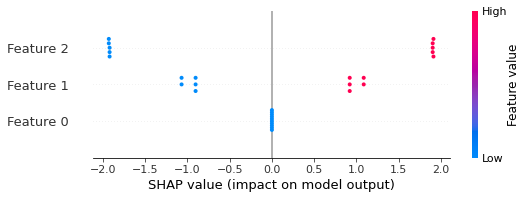

In [8]:
shap.summary_plot(shap_values, Xt)